Sure. Here is the Python code to import the data and do EDA on the dataset in Google Colab:

In [227]:
# Importing the necessary python libraries (data wrangling and visualisation)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# Importing the dataset
rawdataframe = pd.read_csv('./dataset/Electric_Vehicle_Population_Data.csv')

# Get some summary statistics of the dataset
print(rawdataframe.describe())



         Postal Code     Model Year  Electric Range      Base MSRP  \
count  138776.000000  138779.000000   138779.000000  138779.000000   
mean    98172.902404    2019.772098       72.305760    1405.497770   
std      2411.731323       3.013002       97.772731    9547.392794   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98122.000000    2021.000000       21.000000       0.000000   
75%     98370.000000    2022.000000      126.000000       0.000000   
max     99701.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         138464.000000    1.387790e+05       1.387760e+05  
mean              29.433167    2.079563e+08       5.297149e+10  
std               14.796927    8.455916e+07       1.647491e+09  
min                1.000000    4.385000e+03       1.081042e+09  
25%               18.000000    1.647984e+08 

In [ ]:

# Ploting a histogram of the range(miles) of the EV on a single charge
plt.hist(rawdataframe['Electric Range'])
plt.show()

# Plot a scatter plot of the base MSRP vs. the electric range
plt.scatter(rawdataframe['Base MSRP'], rawdataframe['Electric Range'])
plt.show()

In [228]:
# this is a check for null values
rawdataframe.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                286
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 315
DOL Vehicle ID                                         0
Vehicle Location                                       6
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [229]:
# Step-Iterate over the rows in the DataFrame
for index, row in rawdataframe.iterrows():
    if pd.isnull(row["Postal Code"]):
        print(row)
        print(index)


# coincidently we find that the 3 rows posses lot of null values.

VIN (1-10)                                                                        1N4AZ0CP1D
County                                                                                   NaN
City                                                                                     NaN
State                                                                                     AP
Postal Code                                                                              NaN
Model Year                                                                              2013
Make                                                                                  NISSAN
Model                                                                                   LEAF
Electric Vehicle Type                                         Battery Electric Vehicle (BEV)
Clean Alternative Fuel Vehicle (CAFV) Eligibility    Clean Alternative Fuel Vehicle Eligible
Electric Range                                                        

In [230]:
# Exclude rows with null values
locateddataframe = rawdataframe[~pd.isnull(rawdataframe["Postal Code"])]
locateddataframe.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                286
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                       3
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [67]:
# repeating Step-Iterate and clearing null values
for index, row in rawdataframe.iterrows():
    if pd.isnull(row["Vehicle Location"]):
        print(row)
        print(index)
        
        

VIN (1-10)                                                                        1N4AZ0CP1D
County                                                                                   NaN
City                                                                                     NaN
State                                                                                     AP
Postal Code                                                                              NaN
Model Year                                                                              2013
Make                                                                                  NISSAN
Model                                                                                   LEAF
Electric Vehicle Type                                         Battery Electric Vehicle (BEV)
Clean Alternative Fuel Vehicle (CAFV) Eligibility    Clean Alternative Fuel Vehicle Eligible
Electric Range                                                        

In [232]:
attributedlocationsdataframe = rawdataframe[~pd.isnull(rawdataframe["Vehicle Location"])]
attributedlocationsdataframe.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                286
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

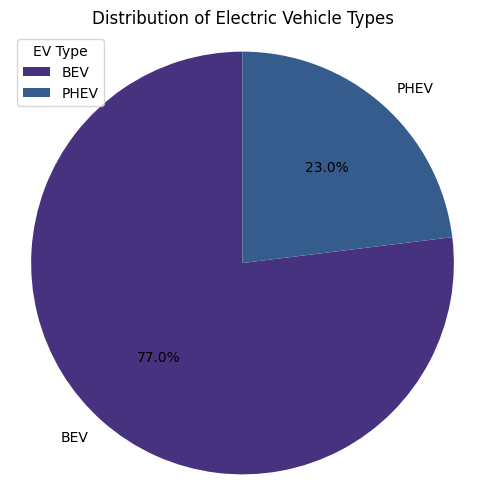

In [231]:
# attributedlocationsdataframe['Electric Vehicle Type'].value_counts().plot(kind='pie')

# Plot the pie chart for 'EV Type' using value_counts()
plt.figure(figsize=(6, 6))

# Get the value counts for 'EV Type' and plot the pie chart
ev_type_counts = attributedlocationsdataframe['Electric Vehicle Type'].value_counts()
plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=90)

# Add attributes to the pie chart
plt.title('Distribution of Electric Vehicle Types')
plt.legend(title='EV Type', loc='best')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')  
plt.show()



# my learning

In [233]:
# while scanning the data fouynd some inconsistencies
attributedlocationsdataframe[['VIN (1-10)','Postal Code','Legislative District','Vehicle Location','2020 Census Tract']].head()
# selectedcolumn.head()

,VIN (1-10),Postal Code,Legislative District,Vehicle Location,2020 Census Tract
0,1N4AZ0CP5D,98310.0,23.0,POINT (-122.61136499999998 47.575195000000065),5.303508e+10
1,1N4AZ1CP8K,98366.0,26.0,POINT (-122.63926499999997 47.53730000000007),5.303509e+10
2,5YJXCAE28L,98199.0,36.0,POINT (-122.394185 47.63919500000003),5.303301e+10
3,SADHC2S1XK,98503.0,2.0,POINT (-122.8285 47.03646),5.306701e+10
4,JN1AZ0CP9B,98204.0,21.0,POINT (-122.24128499999995 47.91088000000008),5.306104e+10


In [234]:
# Convert the floating point value to an integer
attributedlocationsdataframe['Postal Code'] = attributedlocationsdataframe['Postal Code'].astype(int)

# Replace NaN with 0
attributedlocationsdataframe = attributedlocationsdataframe.fillna(0)
attributedlocationsdataframe['Legislative District'] = attributedlocationsdataframe['Legislative District'].astype(int)

# Column '2020 Census has big value so we consider it as string and then handle the formatting
attributedlocationsdataframe["2020 Census Tract"] = attributedlocationsdataframe["2020 Census Tract"].astype(str).str[:-2]
attributedlocationsdataframe.head()

C:\Users\sshah\AppData\Local\Temp\ipykernel_41560\4151842335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributedlocationsdataframe['Postal Code'] = attributedlocationsdataframe['Postal Code'].astype(int)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP5D,Kitsap,Bremerton,WA,98310,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,23,214384901,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC,53035080400
1,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,26,271008636,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,53035092300
2,5YJXCAE28L,King,Seattle,WA,98199,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,36,8781552,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005600
3,SADHC2S1XK,Thurston,Olympia,WA,98503,2019,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234,0,2,8308492,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,53067011628
4,JN1AZ0CP9B,Snohomish,Everett,WA,98204,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,21,245524527,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,53061041901


In [78]:

std_EV_type = attributedlocationsdataframe['Electric Vehicle Type'].str.extract(r'\((.*?)\)')
attributedlocationsdataframe['Electric Vehicle Type'] = std_EV_type

attributedlocationsdataframe.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP5D,Kitsap,Bremerton,WA,98310,2013,NISSAN,LEAF,BEV,Clean Alternative Fuel Vehicle Eligible,75,0,23,214384901,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC,53035080400
1,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366,2019,NISSAN,LEAF,BEV,Clean Alternative Fuel Vehicle Eligible,150,0,26,271008636,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,53035092300
2,5YJXCAE28L,King,Seattle,WA,98199,2020,TESLA,MODEL X,BEV,Clean Alternative Fuel Vehicle Eligible,293,0,36,8781552,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005600
3,SADHC2S1XK,Thurston,Olympia,WA,98503,2019,JAGUAR,I-PACE,BEV,Clean Alternative Fuel Vehicle Eligible,234,0,2,8308492,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,53067011628
4,JN1AZ0CP9B,Snohomish,Everett,WA,98204,2011,NISSAN,LEAF,BEV,Clean Alternative Fuel Vehicle Eligible,73,0,21,245524527,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,53061041901


In [235]:
# distinct_values = rawdataframe['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()
# distinct_values

def eligibilityCheck(reason):
    if reason == "Clean Alternative Fuel Vehicle Eligible":
        return "Yes"
    elif reason == "Not eligible due to low battery range":
        return "No"
    else:
        return "May be"
    
   
   
attributedlocationsdataframe['CAFV Eligibility'] = attributedlocationsdataframe['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].apply(eligibilityCheck)
attributedlocationsdataframe.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,CAFV Eligibility
0,1N4AZ0CP5D,Kitsap,Bremerton,WA,98310,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,23,214384901,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC,53035080400,Yes
1,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,26,271008636,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,53035092300,Yes
2,5YJXCAE28L,King,Seattle,WA,98199,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,36,8781552,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005600,Yes
3,SADHC2S1XK,Thurston,Olympia,WA,98503,2019,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234,0,2,8308492,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,53067011628,Yes
4,JN1AZ0CP9B,Snohomish,Everett,WA,98204,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,21,245524527,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,53061041901,Yes
5,1G1RB6S58J,Yakima,Selah,WA,98942,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,13,474699725,POINT (-120.54187999999999 46.654175000000066),PACIFICORP,53077003004,Yes
6,5YJ3E1EB7K,Spokane,Spokane,WA,99203,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,6,241573384,POINT (-117.42526499999997 47.635365000000036),MODERN ELECTRIC WATER COMPANY,53063004200,Yes
7,3FA6P0SU5E,Thurston,Tumwater,WA,98501,2014,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,35,143101213,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,53067011720,No
8,5YJ3E1EB3K,Snohomish,Everett,WA,98203,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,38,209716587,POINT (-122.21310499999998 47.95479000000006),PUGET SOUND ENERGY INC,53061041601,Yes
9,1C4JJXP6XN,Kitsap,Port Orchard,WA,98366,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,26,205776434,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,53035092200,No


array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [236]:


# Get the POINT data from the column
column_data = attributedlocationsdataframe['Vehicle Location']


# Split the POINT data into two columns
latitude_column = column_data.str.split(' ').str[1].str[1:]
longitude_column = column_data.str.split(' ').str[2].str[:-1]

# print(latitude_column)
# print(longitude_column)
# Add the two new columns to the DataFrame
attributedlocationsdataframe['latitude'] = latitude_column
attributedlocationsdataframe['longitude'] = longitude_column


attributedlocationsdataframe.head(10)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,CAFV Eligibility,latitude,longitude
0,1N4AZ0CP5D,Kitsap,Bremerton,WA,98310,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,23,214384901,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC,53035080400,Yes,-122.61136499999998,47.575195000000065
1,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,26,271008636,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,53035092300,Yes,-122.63926499999997,47.53730000000007
2,5YJXCAE28L,King,Seattle,WA,98199,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,36,8781552,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005600,Yes,-122.394185,47.63919500000003
3,SADHC2S1XK,Thurston,Olympia,WA,98503,2019,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234,0,2,8308492,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,53067011628,Yes,-122.8285,47.03646
4,JN1AZ0CP9B,Snohomish,Everett,WA,98204,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,21,245524527,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,53061041901,Yes,-122.24128499999995,47.91088000000008
5,1G1RB6S58J,Yakima,Selah,WA,98942,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,13,474699725,POINT (-120.54187999999999 46.654175000000066),PACIFICORP,53077003004,Yes,-120.54187999999999,46.654175000000066
6,5YJ3E1EB7K,Spokane,Spokane,WA,99203,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,6,241573384,POINT (-117.42526499999997 47.635365000000036),MODERN ELECTRIC WATER COMPANY,53063004200,Yes,-117.42526499999997,47.635365000000036
7,3FA6P0SU5E,Thurston,Tumwater,WA,98501,2014,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,35,143101213,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,53067011720,No,-122.89692,47.043535
8,5YJ3E1EB3K,Snohomish,Everett,WA,98203,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,38,209716587,POINT (-122.21310499999998 47.95479000000006),PUGET SOUND ENERGY INC,53061041601,Yes,-122.21310499999998,47.95479000000006
9,1C4JJXP6XN,Kitsap,Port Orchard,WA,98366,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,26,205776434,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,53035092200,No,-122.63926499999997,47.53730000000007


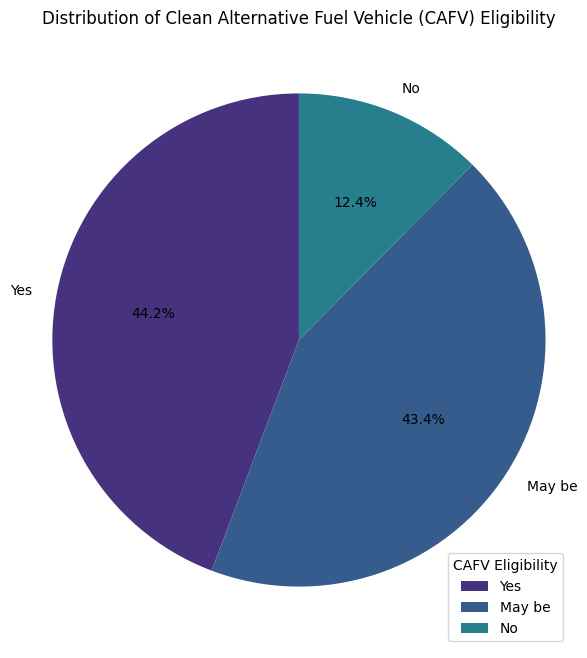

In [237]:
# attributedlocationsdataframe.isnull().sum()
# attributedlocationsdataframe.shape

# Plot the pie chart for 'EV Type' using value_counts()
plt.figure(figsize=(7, 8))

# Get the value counts for 'EV Type' and plot the pie chart
ev_type_counts = attributedlocationsdataframe['CAFV Eligibility'].value_counts()
plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=90)

# Add attributes to the pie chart
plt.title('Distribution of Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.legend(title='CAFV Eligibility', loc='lower right')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')  
plt.show()

In [238]:
column_rename_mapping = {
    'VIN (1-10)': 'VIN',
    'Electric Vehicle Type': 'EV Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV Eligibility Reason',
    'latitude': 'Latitude',
    'longitude': 'Longitude'
}
rename_dataframe = attributedlocationsdataframe.rename(columns=column_rename_mapping)



In [239]:
new_column_order = [ 'VIN', 'Make', 'Model', 'Model Year', 'EV Type', 'Electric Range', 'Electric Utility', 'CAFV Eligibility', 'CAFV Eligibility Reason', 'Base MSRP', 
                    'County',	'City',	'State', 'Postal Code', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Latitude', 'Longitude']

rearranged_df = rename_dataframe.reindex(columns=new_column_order)
rearranged_df.head()

,VIN,Make,Model,Model Year,EV Type,Electric Range,Electric Utility,CAFV Eligibility,CAFV Eligibility Reason,Base MSRP,County,City,State,Postal Code,Legislative District,DOL Vehicle ID,Vehicle Location,Latitude,Longitude
0,1N4AZ0CP5D,NISSAN,LEAF,2013,Battery Electric Vehicle (BEV),75,PUGET SOUND ENERGY INC,Yes,Clean Alternative Fuel Vehicle Eligible,0,Kitsap,Bremerton,WA,98310,23,214384901,POINT (-122.61136499999998 47.575195000000065),-122.61136499999998,47.575195000000065
1,1N4AZ1CP8K,NISSAN,LEAF,2019,Battery Electric Vehicle (BEV),150,PUGET SOUND ENERGY INC,Yes,Clean Alternative Fuel Vehicle Eligible,0,Kitsap,Port Orchard,WA,98366,26,271008636,POINT (-122.63926499999997 47.53730000000007),-122.63926499999997,47.53730000000007
2,5YJXCAE28L,TESLA,MODEL X,2020,Battery Electric Vehicle (BEV),293,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Yes,Clean Alternative Fuel Vehicle Eligible,0,King,Seattle,WA,98199,36,8781552,POINT (-122.394185 47.63919500000003),-122.394185,47.63919500000003
3,SADHC2S1XK,JAGUAR,I-PACE,2019,Battery Electric Vehicle (BEV),234,PUGET SOUND ENERGY INC,Yes,Clean Alternative Fuel Vehicle Eligible,0,Thurston,Olympia,WA,98503,2,8308492,POINT (-122.8285 47.03646),-122.8285,47.03646
4,JN1AZ0CP9B,NISSAN,LEAF,2011,Battery Electric Vehicle (BEV),73,PUGET SOUND ENERGY INC,Yes,Clean Alternative Fuel Vehicle Eligible,0,Snohomish,Everett,WA,98204,21,245524527,POINT (-122.24128499999995 47.91088000000008),-122.24128499999995,47.91088000000008


In [197]:
# Get the GeographicalState column
geographical_state_column = rearranged_df['State']

# Get the Car Make 
Make_column = rearranged_df['Make']


# Count the occurrence of each state
state_counts = geographical_state_column.value_counts()

# Count the occurrence of each car-make
make_counts = Make_column.value_counts()

# Create a new DataFrame to store the results
state_counts_df = pd.DataFrame({
    'GeoState': state_counts.index,
    'Count': state_counts.values
})

# Create a new DataFrame to store the results
carmake_counts_df = pd.DataFrame({
    'CarMake': make_counts.index,
    'Count': make_counts.values
})

# Print the state counts and car make counts DataFrame
# print(state_counts_df)
# print(carmake_counts_df)

In [132]:
rearranged_df

,VIN,Make,Model,Model Year,EV Type,Electric Range,Electric Utility,CAFV Eligibility,CAFV Eligibility Reason,Base MSRP,County,City,State,Postal Code,Legislative District,DOL Vehicle ID,Vehicle Location,Latitude,Longitude
0,1N4AZ0CP5D,NISSAN,LEAF,2013,BEV,75,PUGET SOUND ENERGY INC,Yes,Clean Alternative Fuel Vehicle Eligible,0,Kitsap,Bremerton,WA,98310,23,214384901,POINT (-122.61136499999998 47.575195000000065),-122.61136499999998,47.575195000000065
1,1N4AZ1CP8K,NISSAN,LEAF,2019,BEV,150,PUGET SOUND ENERGY INC,Yes,Clean Alternative Fuel Vehicle Eligible,0,Kitsap,Port Orchard,WA,98366,26,271008636,POINT (-122.63926499999997 47.53730000000007),-122.63926499999997,47.53730000000007
2,5YJXCAE28L,TESLA,MODEL X,2020,BEV,293,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Yes,Clean Alternative Fuel Vehicle Eligible,0,King,Seattle,WA,98199,36,8781552,POINT (-122.394185 47.63919500000003),-122.394185,47.63919500000003
3,SADHC2S1XK,JAGUAR,I-PACE,2019,BEV,234,PUGET SOUND ENERGY INC,Yes,Clean Alternative Fuel Vehicle Eligible,0,Thurston,Olympia,WA,98503,2,8308492,POINT (-122.8285 47.03646),-122.8285,47.03646
4,JN1AZ0CP9B,NISSAN,LEAF,2011,BEV,73,PUGET SOUND ENERGY INC,Yes,Clean Alternative Fuel Vehicle Eligible,0,Snohomish,Everett,WA,98204,21,245524527,POINT (-122.24128499999995 47.91088000000008),-122.24128499999995,47.91088000000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138774,KNAGV4LD6L,KIA,OPTIMA,2020,PHEV,28,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,No,Not eligible due to low battery range,0,Clark,Vancouver,WA,98686,17,122272881,POINT (-122.64839529999995 45.70104270000007),-122.64839529999995,45.70104270000007
138775,7SAYGDEE1N,TESLA,MODEL Y,2022,BEV,0,PUGET SOUND ENERGY INC,Eligibility unknown as battery range has not b...,Eligibility unknown as battery range has not b...,0,Thurston,Lacey,WA,98503,22,187390038,POINT (-122.8285 47.03646),-122.8285,47.03646
138776,5YJYGDEE7M,TESLA,MODEL Y,2021,BEV,0,BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,Eligibility unknown as battery range has not b...,Eligibility unknown as battery range has not b...,0,Benton,Richland,WA,99352,8,181300416,POINT (-119.29441499999996 46.27187500000008),-119.29441499999996,46.27187500000008
138777,WBY33AW08P,BMW,I4,2023,BEV,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,Eligibility unknown as battery range has not b...,Eligibility unknown as battery range has not b...,0,Pierce,Tacoma,WA,98443,25,224612055,POINT (-122.36463499999996 47.19449000000003),-122.36463499999996,47.19449000000003


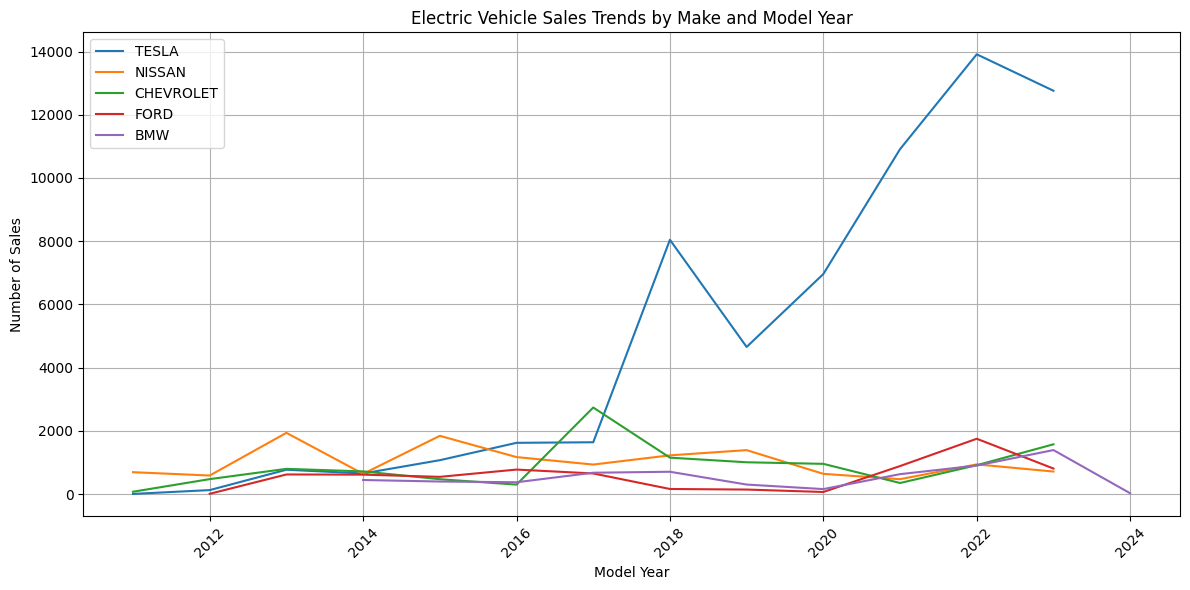

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the data into a DataFrame named 'electric_vehicles_df'
electric_vehicles_df = rearranged_df[ rearranged_df['Model Year'] > 2010 ]

# Group the data by 'Make' and 'Model Year' and count the number of electric vehicles sold for each combination
sales_by_make_model_year = electric_vehicles_df.groupby(['Make', 'Model Year'])['VIN'].count().reset_index()
sales_by_make_model_year.rename(columns={'VIN': 'Number of Sales'}, inplace=True)

# Sort the data in descending order based on the number of sales to find the popular electric vehicle manufacturers
popular_makes = sales_by_make_model_year.groupby('Make')['Number of Sales'].sum().sort_values(ascending=False).index

# Plot the sales trends for the top 5 popular electric vehicle manufacturers
top_n = 5
plt.figure(figsize=(12, 6))

for make in popular_makes[:top_n]:
    make_data = sales_by_make_model_year[sales_by_make_model_year['Make'] == make]
    plt.plot(make_data['Model Year'], make_data['Number of Sales'], label=make)

plt.xlabel('Model Year')
plt.ylabel('Volume of Sales')
plt.title('Electric Vehicle Sales Trends by Make and Model Year')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

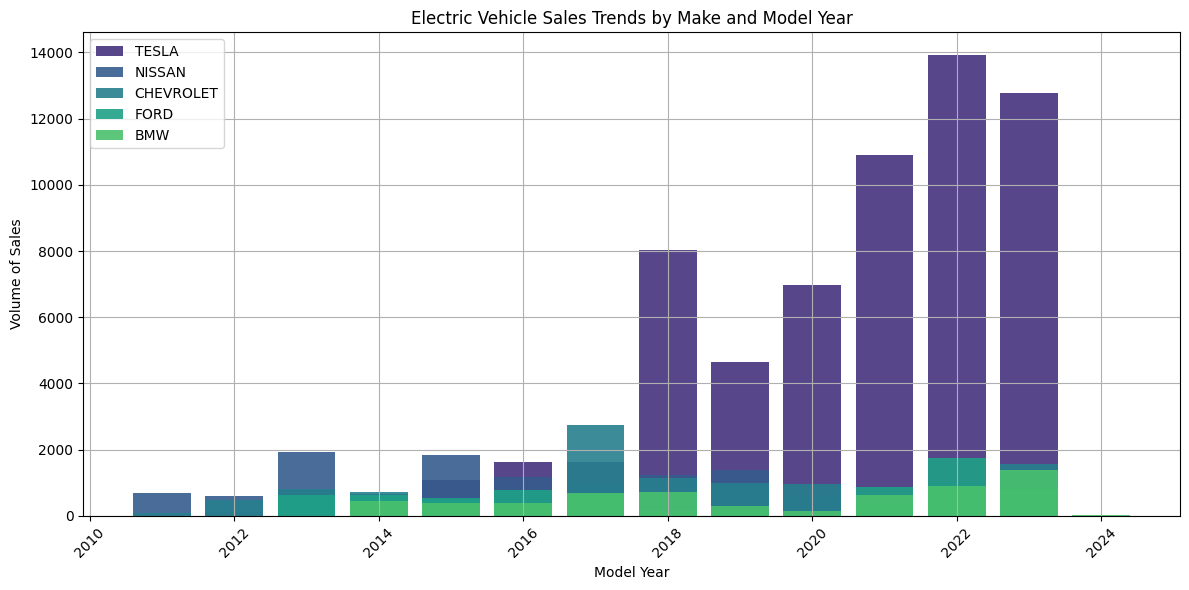

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded the data into a DataFrame named 'electric_vehicles_df'
electric_vehicles_df = rearranged_df[rearranged_df['Model Year'] > 2010]

# Group the data by 'Make' and 'Model Year' and count the number of electric vehicles sold for each combination
sales_by_make_model_year = electric_vehicles_df.groupby(['Make', 'Model Year'])['VIN'].count().reset_index()
sales_by_make_model_year.rename(columns={'VIN': 'Number of Sales'}, inplace=True)

# Sort the data in descending order based on the number of sales to find the popular electric vehicle manufacturers
popular_makes = sales_by_make_model_year.groupby('Make')['Number of Sales'].sum().sort_values(ascending=False).index

# Plot the sales trends for the top 5 popular electric vehicle manufacturers using a column chart (bar chart)
top_n = 5
plt.figure(figsize=(12, 6))

for make in popular_makes[:top_n]:
    make_data = sales_by_make_model_year[sales_by_make_model_year['Make'] == make]
    plt.bar(make_data['Model Year'], make_data['Number of Sales'], label=make, alpha=0.9)

plt.xlabel('Model Year')
plt.ylabel('Volume of Sales')
plt.title('Electric Vehicle Sales Trends by Make and Model Year')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

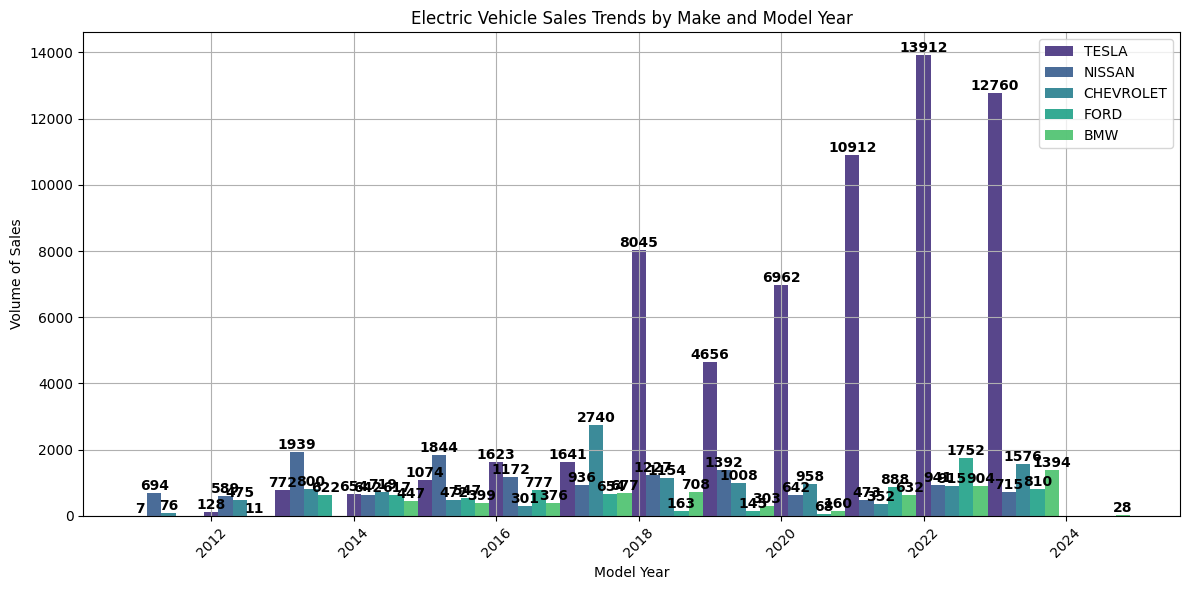

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the data into a DataFrame named 'electric_vehicles_df'
electric_vehicles_df = rearranged_df[rearranged_df['Model Year'] > 2010]

# Group the data by 'Make' and 'Model Year' and count the number of electric vehicles sold for each combination
sales_by_make_model_year = electric_vehicles_df.groupby(['Make', 'Model Year'])['VIN'].count().reset_index()
sales_by_make_model_year.rename(columns={'VIN': 'Number of Sales'}, inplace=True)

# Sort the data in descending order based on the number of sales to find the popular electric vehicle manufacturers
popular_makes = sales_by_make_model_year.groupby('Make')['Number of Sales'].sum().sort_values(ascending=False).index

# Plot the sales trends for the top 5 popular electric vehicle manufacturers using a non-stacked column chart (grouped bar chart)
top_n = 5
plt.figure(figsize=(12, 6))
bar_width = 0.2  # Adjust the width of the bars

for i, make in enumerate(popular_makes[:top_n]):
    make_data = sales_by_make_model_year[sales_by_make_model_year['Make'] == make]
    x_values = make_data['Model Year'] + (i * bar_width)  # Shift the bars to create groups
    plt.bar(x_values, make_data['Number of Sales'], label=make, width=bar_width, alpha=0.9)

    # Add data labels on top of each bar
    for x, y in zip(x_values, make_data['Number of Sales']):
        plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Model Year')
plt.ylabel('Volume of Sales')
plt.title('Electric Vehicle Sales Trends by Make and Model Year')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


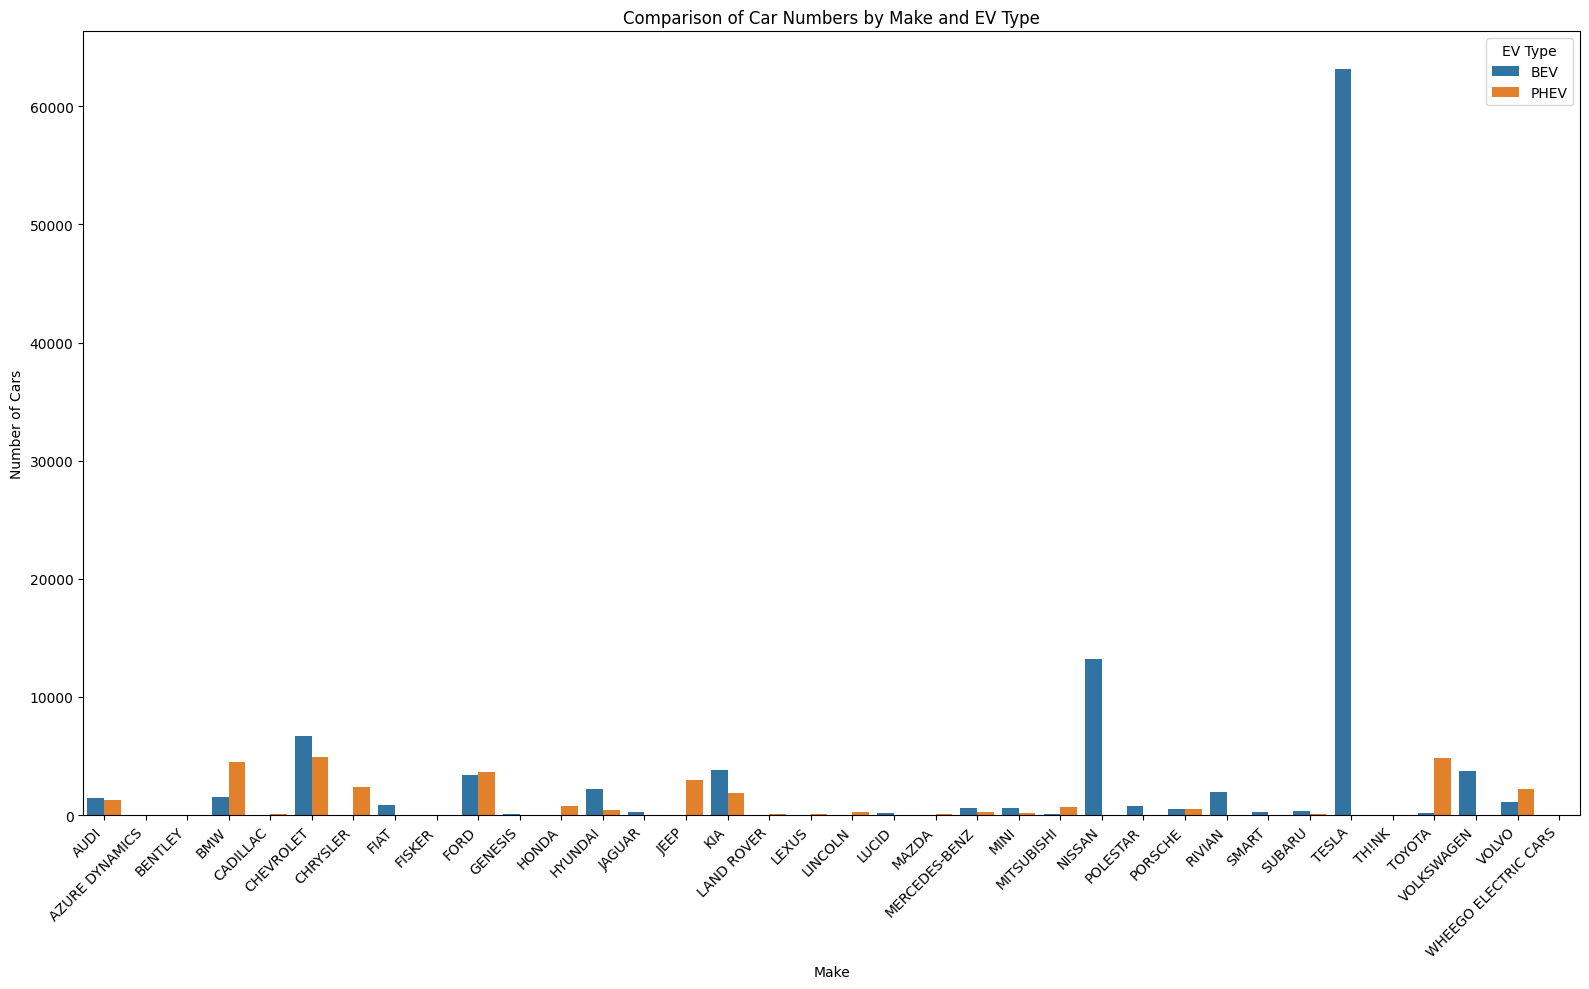

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the data into a DataFrame named 'electric_vehicles_df'

# Create a pivot table to show the count of cars by 'Make' and 'EV Type'
pivot_table = pd.pivot_table(rearranged_df, 
                             values='VIN',          # Use any column to aggregate, we use 'VIN' here.
                             index='Make',          # Rows will be 'Make'.
                             columns='EV Type',     # Columns will be 'EV Type'.
                             aggfunc='count',       # Use count as the aggregation function.
                             fill_value=0)          # Replace NaN with 0 for empty cells.

# Convert the pivot table to a DataFrame for better visualization
car_counts_df = pivot_table.reset_index()

# Melt the DataFrame to have 'EV Type' as a categorical variable
melted_car_counts_df = pd.melt(car_counts_df, id_vars='Make', var_name='EV Type', value_name='Number of Cars')

# Plot the bar chart using Seaborn
plt.figure(figsize=(16, 10))
sns.barplot(x='Make', y='Number of Cars', hue='EV Type', data=melted_car_counts_df)
plt.xlabel('Make')
plt.ylabel('Number of Cars')
plt.title('Comparison of Car Numbers by Make and EV Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='EV Type')



plt.tight_layout()
plt.show()


In [149]:
allEVdataframe = rearranged_df.loc[rearranged_df['EV Type'] == 'BEV']
allEVdataframe.shape

(106788, 19)

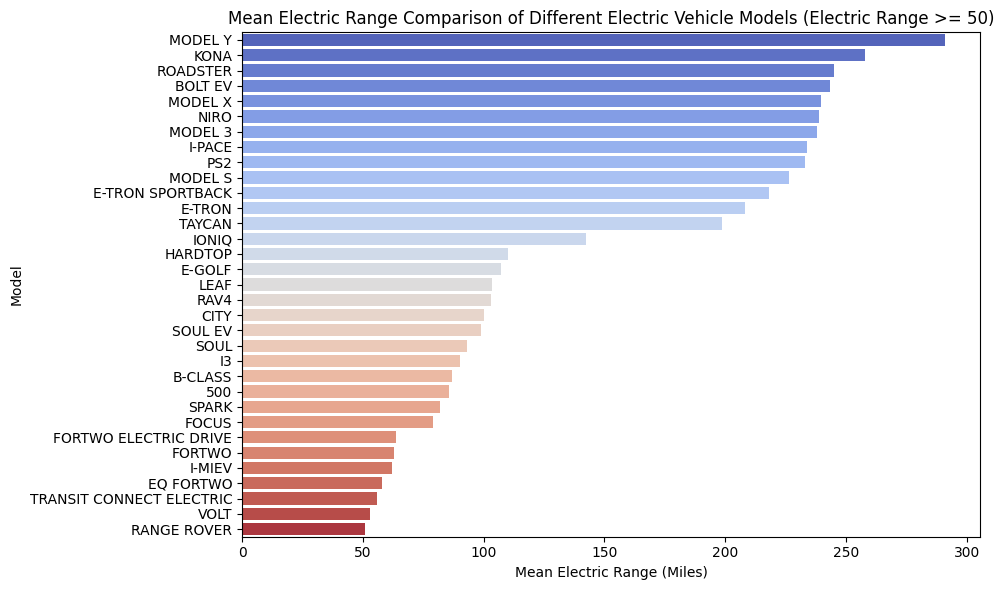

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the data into a DataFrame named 'electric_vehicles_df'
# Calculate the mean electric range for each vehicle model
# mean_electric_ranges = electric_vehicles_df.groupby('Model')['Electric Range'].mean().reset_index()

# # Sort the data in descending order to find the models with the longest electric range
# mean_electric_ranges = mean_electric_ranges.sort_values(by='Electric Range', ascending=False)

# # Plot a bar chart to compare mean electric ranges of different electric vehicle models
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Electric Range', y='Model', data=mean_electric_ranges)
# plt.xlabel('Mean Electric Range (Miles)')
# plt.ylabel('Model')
# plt.title('Mean Electric Range Comparison of Different Electric Vehicle Models')
# plt.tight_layout()
# plt.show()


# Filter the data to exclude electric ranges less than 50
filtered_data = electric_vehicles_df[electric_vehicles_df['Electric Range'] >= 50]

# Calculate the mean electric range for each vehicle model
mean_electric_ranges = filtered_data.groupby('Model')['Electric Range'].mean().reset_index()

# Sort the data in descending order to find the models with the longest electric range
mean_electric_ranges = mean_electric_ranges.sort_values(by='Electric Range', ascending=False)

# Plot a bar chart to compare mean electric ranges of different electric vehicle models
plt.figure(figsize=(10, 6))
sns.barplot(x='Electric Range', y='Model', data=mean_electric_ranges, palette='coolwarm')
plt.xlabel('Mean Electric Range (Miles)')
plt.ylabel('Model')
plt.title('Mean Electric Range Comparison of Different Electric Vehicle Models (Electric Range >= 50)')
plt.tight_layout()
plt.show()


<Figure size 1000x1000 with 0 Axes>

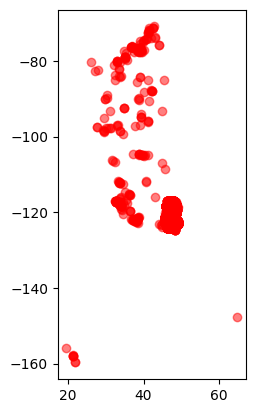

In [219]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have loaded the data into a DataFrame named 'electric_vehicles_df'
# We need 'latitude' and 'longitude' columns to plot the locations on the map


# # Convert latitude and longitude columns to a GeoSeries
# geometry = gpd.points_from_xy(electric_vehicles_df['Longitude'], electric_vehicles_df['Latitude'])

# # Create a GeoDataFrame with the original DataFrame and the GeoSeries as 'geometry'
# gdf = gpd.GeoDataFrame(electric_vehicles_df, geometry=geometry)

# # Load the map data using geopandas, e.g., from a shapefile or GeoJSON file
# map_data = gpd.read_file('./dataset/WA.geojson')  # Replace 'path/to/map_data.shp' with the file path to your map data

# # Plot the map
# fig, ax = plt.subplots(figsize=(10, 10))

# # Plot the map data
# map_data.plot(ax=ax, color='yellow', edgecolor='black', linewidth=0.5)

# # Plot the electric vehicle locations on top of the map
# gdf.plot(ax=ax, color='blue', markersize=1, alpha=0.7)

# # Customize the plot (e.g., add title, labels, etc.)
# plt.title('Geographical Distribution of Electric Vehicles')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # Show the plot
# plt.show()



# Add a column to the dataframe that stores the latitude and longitude of each car
# electric_vehicles_df['latitude'] = df['Vehicle Location'].apply(lambda x: x.y)
# electric_vehicles_df['longitude'] = df['Vehicle Location'].apply(lambda x: x.x)

# Use the geopandas library to create a GeoDataFrame from the dataframe
gdf = gpd.GeoDataFrame(electric_vehicles_df, geometry=gpd.points_from_xy(electric_vehicles_df['Longitude'], electric_vehicles_df['Latitude']))

usa = gpd.read_file('naturalearth_vector/ne_110m_admin_1_states_provinces.shp')

# Plot the GeoDataFrame on the USA map
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='mercator')
usa.plot(ax=ax, alpha=0.5, color='lightgray')
gdf.plot(ax=ax, color='red', alpha=0.5)
plt.show()

# Plot the GeoDataFrame on a map
# plt.figure(figsize=(10, 10))
# gdf.plot(color='red', alpha=0.5)
# plt.show()


C:\Users\sshah\AppData\Local\Temp\ipykernel_41560\3919289362.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric_vehicles_df['Model Year'] = pd.to_numeric(electric_vehicles_df['Model Year'])


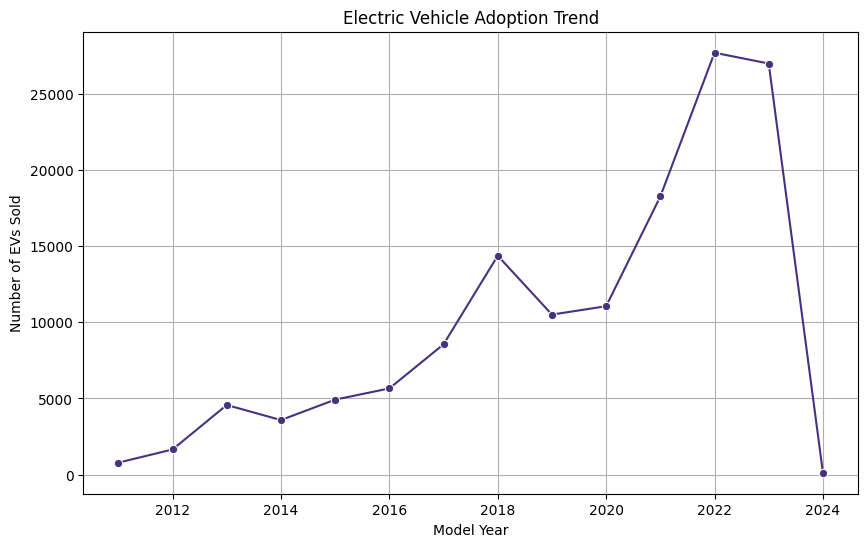

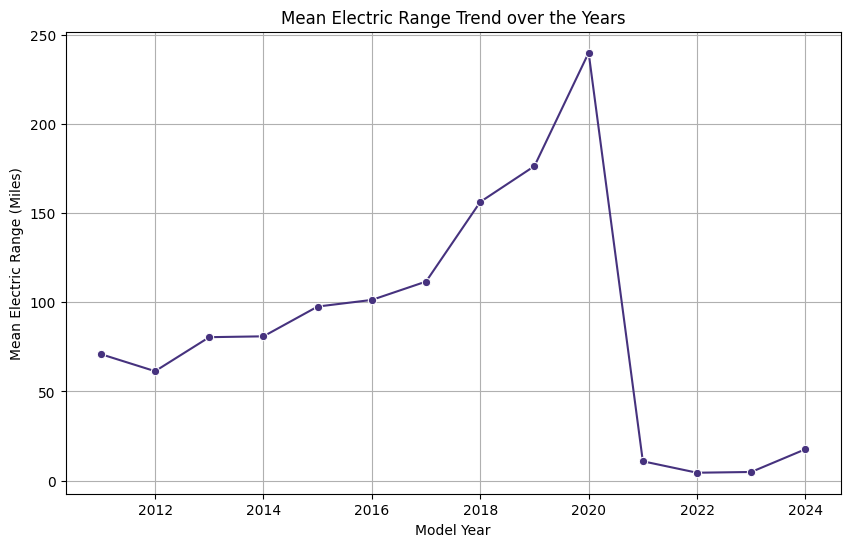

In [222]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns


# Data Preprocessing (if needed)
# Convert 'Model Year' column to numeric type if it's not already in numeric format
electric_vehicles_df['Model Year'] = pd.to_numeric(electric_vehicles_df['Model Year'])

# Grouping and Aggregation
# Group the data by 'Model Year' and count the number of EVs sold each year
ev_count_by_year = electric_vehicles_df.groupby('Model Year')['VIN'].count().reset_index()
ev_count_by_year.rename(columns={'VIN': 'Number of EVs Sold'}, inplace=True)

# Calculate the mean electric range for each year
mean_range_by_year = electric_vehicles_df.groupby('Model Year')['Electric Range'].mean().reset_index()

# Trend Visualization
# Plot the trend of EV adoption (Number of EVs sold) over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='Number of EVs Sold', data=ev_count_by_year, marker='o')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs Sold')
plt.title('Electric Vehicle Adoption Trend')
plt.grid(True)
plt.show()

# Plot the trend of mean electric range over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=mean_range_by_year, marker='o')
plt.xlabel('Model Year')
plt.ylabel('Mean Electric Range (Miles)')
plt.title('Mean Electric Range Trend over the Years')
plt.grid(True)
plt.show()




In [150]:

# Get the count of cars by make
make_counts = allEVdataframe['Make'].value_counts()

# Get the top 10 makes
top_10_makes = make_counts.sort_values(ascending=False).head(10)
top_10_makes

Make
TESLA         63185
NISSAN        13206
CHEVROLET      6676
KIA            3848
VOLKSWAGEN     3712
FORD           3407
HYUNDAI        2216
RIVIAN         1933
BMW            1531
AUDI           1481
Name: count, dtype: int64

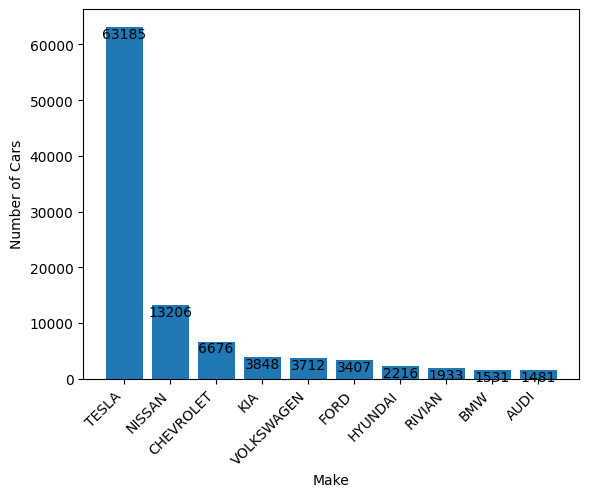

In [159]:
# Get the count of cars by make
make_counts = allEVdataframe['Make'].value_counts()

# Get the top 10 makes
top_10_makes = make_counts.sort_values(ascending=False).head(10)

for index, value in enumerate(top_10_makes):
    plt.text(index, value, str(value), ha='center', va='top')

# Create a bar chart of the top 10 makes
plt.bar(top_10_makes.index, top_10_makes.values)
plt.xlabel('Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Grouping the data by 'Make' and 'Model Year' and counting the no. of EV sold for each year by each company
sales_by_make_model_year = rearranged_df.groupby(['Make', 'Model Year'])['VIN'].count().reset_index()
sales_by_make_model_year.rename(columns={'VIN': 'Number of Sales'}, inplace=True)

# Sort the data in descending order based on the number of sales to find the popular electric vehicle manufacturers
popular_makes = sales_by_make_model_year.groupby('Make')['Number of Sales'].sum().sort_values(ascending=False).index

# Plot the sales trends for the top 5 popular electric vehicle manufacturers
top_n = 5
plt.figure(figsize=(12, 6))

for make in popular_makes[:top_n]:
    make_data = sales_by_make_model_year[sales_by_make_model_year['Make'] == make]
    plt.bar(make_data['Model Year'], make_data['Number of Sales'], label=make)

plt.xlabel('Model Year')
plt.ylabel('Number of Sales')
plt.title('Electric Vehicle Sales Trends by Make and Model Year')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This code will first import the necessary libraries, then import the dataset from a CSV file. It will then print the first few rows of the dataset, get some summary statistics, plot a histogram of the electric range, and plot a scatter plot of the base MSRP vs. the electric range. It will also create a correlation matrix of the dataset and print the features that are most correlated with the electric range. Finally, it will perform further EDA on the selected features.

To run this code, you will need to create a Google Colab notebook and paste the code into the notebook. You will also need to upload the CSV file to your Google Drive. Once you have done this, you can run the code by clicking on the "Run" button.